### Realtime Object Detection

Detects objects in realtime video streaming via webcam

#### Import libraries for preprocessing and annotation

In [1]:
import numpy as np
import cv2
from pathlib import Path
from IPython.display import Image
import torch

ModuleNotFoundError: No module named 'cv2'

#### Load pretrained models

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

NameError: name 'torch' is not defined

#### Run object detection on example image

In [3]:
imgs = ['https://img.theweek.in/content/dam/week/news/sci-tech/images/2022/4/5/macaw-bird.jpg']
Image(url=imgs[0])

In [4]:
results = model(imgs)
results.print()
results.save(".")

Saved 1 image to runs\detect\exp


image 1/1: 443x760 2 birds
Speed: 891.1ms pre-process, 254.0ms inference, 16.5ms NMS per image at shape (1, 3, 384, 640)


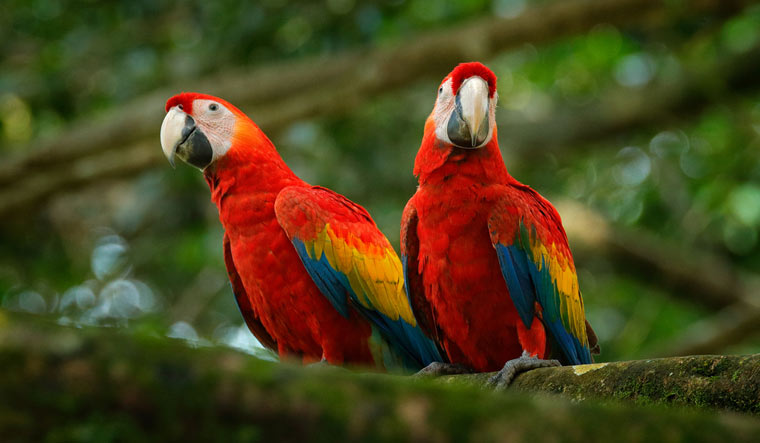

In [7]:
Image(filename='C:/Users/Sasi Kumar/Downloads/macaw-bird.jpg') 

#### Run object detection on realtime video via webcam

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, image_np = cap.read()
    results = model(image_np)
    df_result = results.pandas().xyxy[0]
    dict_result = df_result.to_dict()
    scores = list(dict_result["confidence"].values())
    labels = list(dict_result["name"].values())
    
    list_boxes = list()
    for dict_item in df_result.to_dict('records'):
        list_boxes.append(list(dict_item.values())[:4])
    count = 0
    
    for xmin, ymin, xmax, ymax in list_boxes:
        image_np = cv2.rectangle(image_np, pt1=(int(xmin),int(ymin)), pt2=(int(xmax),int(ymax)), \
                                 color=(255,0, 0), thickness=2)
        cv2.putText(image_np, f"{labels[count]}: {round(scores[count], 2)}", (int(xmin), int(ymin)-10), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        count = count + 1
        
    cv2.imshow('Object Detector', image_np);
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break